landlab directs flow and accumulates it using two types of components:

**FlowDirectors** use the topography to determine how flow moves between adjacent nodes. For every node in the grid it determines the nodes to receive flow and the proportion of flow to send from one node to its receiver. 

The **FlowAccumulator** uses the direction and proportion of flow moving between each node and (optionally) water runoff to calculate drainage area and discharge. 

The **FlowDirectors** are method specific and presently landlab supports four different methods for determining flow direction. 
1. **FlowDirectorSteepest**
2. **FlowDirectorD4** (raster only)
3. **FlowDirectorMFD**
4. **FlowDirectorDINF** (raster only)
    
    
    

In [1]:
# import necessary landlab components
import numpy as np
from landlab import RasterModelGrid, HexModelGrid
from landlab.components import FlowAccumulator
from landlab.components import(FlowDirectorD8, 
                               FlowDirectorDINF, 
                               FlowDirectorMFD, 
                               FlowDirectorSteepest)

from landlab.plot.drainage_plot import drainage_plot

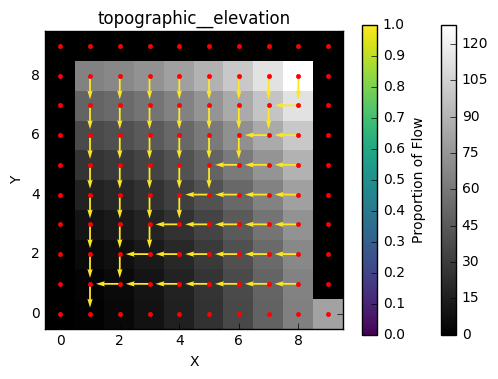

In [6]:
mg = RasterModelGrid((10,10), spacing=(1, 1))
mg.set_closed_boundaries_at_grid_edges(True, True, True, False)
_ = mg.add_field('topographic__elevation',
                  mg.node_x**2 + mg.node_y**2,
                  at = 'node')
fd = FlowDirectorSteepest(mg, 'topographic__elevation')
fd.run_one_step()

drainage_plot(mg)


In [ ]:

    >>> mg.at_node['flow__receiver_node']
    array([0, 1, 2, 3, 1, 5, 6, 7, 8])
    >>> mg.at_node['topographic__steepest_slope']
    array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])
    >>> mg.at_node['flow__link_to_receiver_node']
    array([-1, -1, -1, -1,  3, -1, -1, -1, -1])
    >>> mg.at_node['flow__sink_flag']
    array([1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int8)
    >>> mg_2 = RasterModelGrid((5, 4), spacing=(1, 1))
    >>> topographic__elevation = np.array([0.,  0.,  0., 0.,
    ...                                    0., 21., 10., 0.,
    ...                                    0., 31., 20., 0.,
    ...                                    0., 32., 30., 0.,
    ...                                    0.,  0.,  0., 0.])
    >>> _ = mg_2.add_field('node',
    ...                    'topographic__elevation',
    ...                    topographic__elevation)
    >>> mg_2.set_closed_boundaries_at_grid_edges(True, True, True, False)
    >>> fd_2 = FlowDirectorSteepest(mg_2)
    >>> fd_2.run_one_step()
    >>> mg_2.at_node['flow__receiver_node'] # doctest: +NORMALIZE_WHITESPACE
    array([ 0,  1,  2,  3,
            4,  1,  2,  7,
            8, 10,  6, 11,
           12, 14, 10, 15,
           16, 17, 18, 19])

    The flow directors also have the ability to return the flow receiver nodes

    >>> receiver = fd.direct_flow()
    >>> receiver
    array([0, 1, 2,
           3, 1, 5,
           6, 7, 8])

    For the second example we will use a Hexagonal Model Grid, a special type
    of Voroni Grid that has regularly spaced hexagonal cells.

    >>> from landlab import HexModelGrid
    >>> mg = HexModelGrid(5,3)
    >>> _ = mg.add_field('topographic__elevation',
    ...                  mg.node_x + np.round(mg.node_y),
    ...                  at = 'node')
    >>> fd = FlowDirectorSteepest(mg, 'topographic__elevation')
    >>> fd.surface_values
    array([ 0. ,  1. ,  2. ,
        0.5,  1.5,  2.5,  3.5,
      1. ,  2. ,  3. ,  4. , 5. ,
        2.5,  3.5,  4.5,  5.5,
            3. ,  4. ,  5. ])
    >>> fd.run_one_step()
    >>> mg.at_node['flow__receiver_node']
    array([ 0,  1,  2,
          3,  0,  1,  6,
        7,  3,  4,  5,  11,
          12,  8,  9, 15,
            16, 17, 18])
    >>> mg.at_node['topographic__steepest_slope']
    array([ 0. ,  0. ,  0. ,
        0. ,  1.5,  1.5,   0. ,
      0. ,  1.5,  1.5,  1.5,  0. ,
        0. ,  1.5,  1.5,  0. ,
            0. ,  0. ,  0. ])
    >>> mg.at_node['flow__link_to_receiver_node']
    array([-1, -1, -1,
         -1,  3,  5, -1,
       -1, 12, 14, 16, -1,
         -1, 25, 27, -1,
           -1, -1, -1])
    >>> mg.at_node['flow__sink_flag']
    array([1, 1, 1,
          1, 0, 0, 1,
         1, 0, 0, 0, 1,
          1, 0, 0, 1,
            1, 1, 1], dtype=int8)
    >>> receiver = fd.direct_flow()
    >>> receiver
    array([ 0,  1,  2,
          3,  0,  1,  6,
        7,  3,  4,  5, 11,
         12,  8,  9, 15,
          16, 17, 18])